This notebook provides examples to go along with the [textbook](http://manipulation.csail.mit.edu/force.html).  I recommend having both windows open, side-by-side!


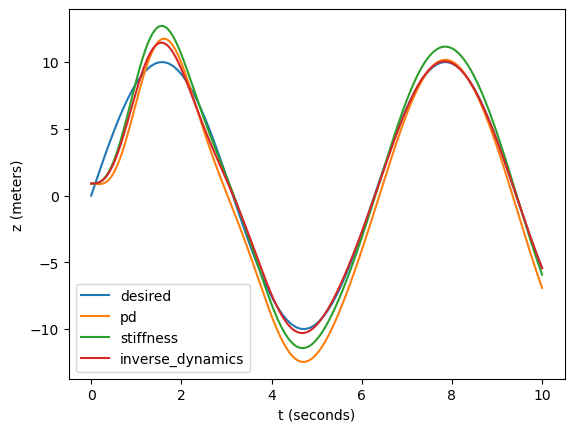

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from pydrake.all import (
    DiagramBuilder,
    LogVectorOutput,
    Simulator,
    SymbolicVectorSystem,
    Variable,
)

q = Variable("q")
v = Variable("v")
t = Variable("t")
kp = 10
kd = 1
m = 1
g = 10
c = 10  # amplitude.  set to zero to see the steady-state response.
q_d = c * np.sin(t)
v_d = c * np.cos(t)
a_d = -c * np.sin(t)

plt.figure()
ts = np.linspace(0, 10, 100)
plt.plot(ts, c * np.sin(ts), label="desired")

for control in ["pd", "stiffness", "inverse_dynamics"]:
    if control == "pd":
        u = kp * (q_d - q) + kd * (v_d - v)
    if control == "stiffness":
        u = kp * (q_d - q) + kd * (v_d - v) + m * g
    if control == "inverse_dynamics":
        u = m * (a_d + kp * (q_d - q) + kd * (v_d - v)) + m * g

    sys = SymbolicVectorSystem(
        state=[q, v], time=t, dynamics=[v, -g + u / m], output=[q]
    )

    builder = DiagramBuilder()
    system = builder.AddSystem(sys)
    logger = LogVectorOutput(system.get_output_port(0), builder)
    diagram = builder.Build()

    context = diagram.CreateDefaultContext()
    context.SetContinuousState([0.9, 0])

    simulator = Simulator(diagram, context)
    simulator.AdvanceTo(10)

    # Plot the results.
    log = logger.FindLog(context)
    plt.plot(log.sample_times(), log.data().transpose(), label=control)

plt.legend()
plt.xlabel("t (seconds)")
plt.ylabel("z (meters)");

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=09bc463a-17e1-4486-8764-1ca9d9b209cb' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>